## _Hello! And Welcome to Coursera Capstone Project - Battle of Neighborhoods_

Please go through below sections for project details.

### _Introduction:_

#### _Bengaluru:Popular megacity of India_

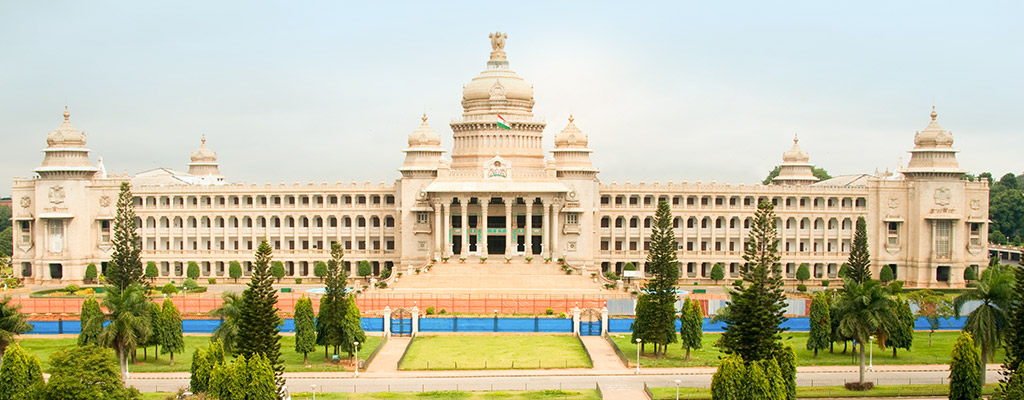

In [1]:
from IPython.display import display, Image
display(Image(filename='C:/Users/AKSHATA/Desktop/img/Bengaluru.jpg',width=800,height=800))

   *Bangalore (Bengaluru)!!*, is the capital of the Indian state of Karnataka. It is the third most popular megacity in India, next to Mumbai and Delhi. City is referred to as the *"Silicon Valley of India"*,*'City of Gardens'*, and *'Pub Capital of India'*.It plays vital role as the nation's leading information technology (IT) exporter, beauty of the city reflected in its nature,culture,life style. The city is home to a number of scenic parks, movie theater complexes, boulevards, and famous memorials and edifices. The city features an exciting nightlife with a host of exotic pubs.The diversity of the city attracts many people within the country and around the world.

### _Audiance Interest:_

As a resident of the city, to people who are looking for best place to stay in the country let me tell you, <b>*"Why Bangalore is the best to live in India."*<b>

### _Source of Data:_

   Let’s explore the city on different levels such as geography, climate, culture, education, career, life style, sports using foursquare API. Using different API calls, let’s get information on different topics in the city. 

   Major source of the data is collected from Wikipedia, different websites for articles on the city and of course! using foursquare API. Still want more details, refer following sites.
   
   1. https://en.wikipedia.org/wiki/Bangalore
   2. https://en.wikipedia.org/wiki/List_of_tallest_buildings_in_Bangalore
   3. https://en.wikipedia.org/wiki/List_of_Chola_temples_in_Bangalore
   4. https://www.karnataka.com/profile/bangalore-main-revenue-generator-karnataka
   5. https://en.wikipedia.org/wiki/Software_Technology_Parks_of_India
 

### _Data Collection:_

   I will explore the city around following categories which will explain why the city is best place to live. Exploration is divided into following categories and data will be represented in terms of statistics tables and graphs to highlight the objective the project.

1. Geography : Population and Climate details
2. Infrastructure, Culture, Tourist places
3. Food, Shopping, Nightlife and Fun
4. Economy

Let’s go through below section to see how data will collected and used in the project:

Data -1 : Data is collected for geographical details from following link. Geographical details include population increasing by every year and suitable weather conditions. Source data has a table which will be parsed into xml and stored into Pandas Data Frames. These data will be plotted to explain the objective of the project.

Source: 
1. https://www.yr.no/place/India/Karnataka/Bangalore/statistics.html
2. http://worldpopulationreview.com/world-cities/bangalore-population

Data -2: Data is collected from following links and foursquare API. This data is used to indicate Infrastructure, culture and tourist places of the city contributing to the project. Source data has a table which will be parsed into xml and stored into Pandas Data Frames.

Source:
1. https://en.wikipedia.org/wiki/List_of_tallest_buildings_in_Bangalore
2. https://en.wikipedia.org/wiki/List_of_Chola_temples_in_Bangalore

Data -3: Foursquare API has different categories which help to explore the city. API's are called to collect Food, shopping, nightlife of the city.

Data -4: Economical stats of the city are collected from following link which explains career opportunities for the people.

 Source:
1. https://www.karnataka.com/profile/bangalore-main-revenue-generator-karnataka
2. https://en.wikipedia.org/wiki/Software_Technology_Parks_of_India


##### Lets get started!

In [2]:
# Import all the librabries required for the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import geocoder
import json
import folium
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
from bs4 import BeautifulSoup

print("Libraries Imported Successfully")

#Please use following code to install any package if not found
# !pip install <package name>

Libraries Imported Successfully


#### Weather is first factor that people look for their stay.Bangalore is one of the best places in the world  to live in from a weather point of view. There is often no need of  airconditioning or heating in winter.The temperature in Bangalore is generally cool because of its elevation of 1000 m above sea level. Lets extract weather report from websites and plot the temperature montly.

In [3]:
# parse the URL to find the table
web = requests.get("https://www.yr.no/place/India/Karnataka/Bangalore/statistics.html").text
# make soup using URL
soup = BeautifulSoup(web,'lxml')
#print(soup.prettify())

In [4]:
climate = soup.find('table', class_='yr-table yr-table-stats')
climate_rows = climate.find_all('tr')

In [5]:
info = []
for row in climate_rows:
    i = row.text.split('\n')[1:-2]
    info.append(i)
    
info[0:19]

[['', 'Temperature'],
 ['Months', 'Normal', 'Warmest', 'Coldest'],
 ['January', '21.3°C', '27.3°C', '15.1°C'],
 ['February', '23.6°C', '30.1°C', '17.0°C'],
 ['March', '26.1°C', '32.7°C', '19.5°C'],
 ['April', '28.0°C', '34.2°C', '21.8°C'],
 ['May', '27.4°C', '33.2°C', '21.4°C'],
 ['June', '24.6°C', '29.2°C', '20.1°C'],
 ['July', '23.9°C', '28.1°C', '19.7°C'],
 ['August', '23.5°C', '27.4°C', '19.5°C'],
 ['September', '23.9°C', '28.2°C', '19.6°C'],
 ['October', '23.7°C', '28.0°C', '19.3°C'],
 ['November', '22.2°C', '27.0°C', '17.5°C'],
 ['December', '21.1°C', '26.2°C', '16.0°C']]

In [6]:
climate_df = pd.DataFrame(info[2:],columns=info[1])
#climate_df.to_csv('weather_report.csv')

#### As you can see in below graph, temperature of the city is less than 35 degree which makes it not too hot not too cold. Temperature stays normal in every month.

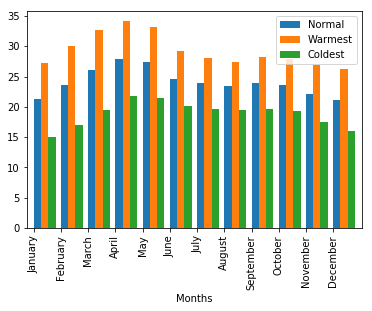

In [7]:
climate_df=pd.read_csv("C:/Users/AKSHATA/Coursera_Capstone/weather_report.csv", index_col = 0)
climate_df.head()
climate_df.plot(kind = 'bar', x = str('Months'), y= ['Normal','Warmest','Coldest'] , width = 0.8, align = 'edge')

           Bengaluru is the second largest metropolitan area in India, after the National Capital Region. If you are a party type, there are a lot of pubs here.. go take a walk in Lalbag, eat chaats in food street near VV Puram, visit all the malls, take a visit to UB City, go to central and the British library, go to ISKCON or the Art of Living if you are the spiritual one.. there is so much to do in Bangalore, there are museums, parks, temples, mosques, churches, art galleries, Institutes, places of historical significance and what not.. more than anything talk to people around in Bangalore as they are the best both in terms of diversity and humanity.

#### Lets explore the city some more. Lets start with finding different infrastructure of the city which enhances the beauty of the city.

In [8]:
#Parse the URL to form data frame
web3 = requests.get("https://en.wikipedia.org/wiki/List_of_tallest_buildings_in_Bangalore").text
soup3 = BeautifulSoup(web3,'lxml')
#print(soup3.prettify())

In [9]:
# Find the table in html and table row
buildings = soup3.find('table',class_="wikitable sortable")
buildings_rows = buildings.find_all('tr')

In [10]:
# Grab the data into list
info3 = []

for row in buildings_rows:
    i = row.text.split('\n') #split the data by newline
    info3.append(i)
    
#info3[0:5]

In [11]:
# Lets display some of the buildings from dataframe
buildings_df = pd.DataFrame(info3[1:],columns=info3[0])
buildings_df.drop(['Rank','Year','Image'], axis=1)
buildings_df

,,Rank,,Name,,Image,,Height,,Floors,,Year,,Use,
0,,1,,Mantri Pinnacle,,,,153 metres (502 ft),,46,,2013,,Residential,
1,,2,,SNN Clermont 1,,,,135 metres (443 ft),,40,,2018,,Residential,
2,,3,,SNN Clermont 2,,,,135 metres (443 ft),,40,,2018,,Residential,
3,,4,,SNN Clermont 3,,,,135 metres (443 ft),,40,,2019,,Residential,
4,,5,,SNN Clermont 4,,,,135 metres (443 ft),,40,,2019,,Residential,
5,,6,,SNN Clermont 5,,,,135 metres (443 ft),,40,,2019,,Residential,
6,,7,,Kingfisher Towers,,,,,,33,,2018,,Residential,
7,,8,,World Trade Center Bangalore,,,,128 metres (420 ft),,32,,2010[2],,Commercial,
8,,9,,UB Tower,,,,128 metres (420 ft),,20,,2008[3],,Commercial,
9,,10,,Sobha Indraprastha,,,,,,37,,2018,,Residential,


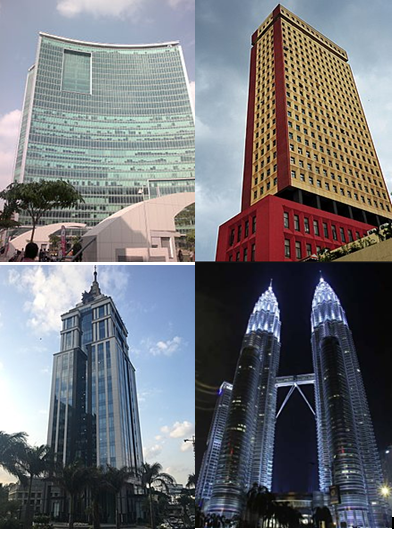

In [12]:
#Below are the some images of tallest buildings of Bengaluru
display(Image(filename='C:/Users/AKSHATA/Desktop/img/building.PNG',width=400,height=400))

In [13]:
# parse the URL to find the table
web4 = requests.get("https://en.wikipedia.org/wiki/List_of_Chola_temples_in_Bangalore").text
# make soup using URL
soup4 = BeautifulSoup(web4,'lxml')
#print(soup4.prettify())

In [14]:
culture = soup4.find('table', class_="wikitable sortable")
culture_rows = culture.find_all('tr')

In [15]:
info4 = []
for row in culture_rows:
    i = row.text.split('\n')[2:-2] # remove first two and last two lines
    info4.append(i)
    
#info4[0:15]

In [16]:
culture = pd.DataFrame(info4[1:],columns=info4[0])
culture

,Name,Locality,Period/Earliest inscription
0,Chokkanathaswamy temple,Domlur,10th century AD
1,Someshwara Temple (Halasuru),Halasuru,
2,Kashi Vishweshwar temple,Kadugodi,
3,Vasantha Vallabharaya Temple,Vasanthapura,
4,Ananda Lingeshwara Temple,Hebbal,
5,Eshwara Temple,Kengeri,1050 AD
6,Dharmesvara Temple,Kondrahalli,1065 AD
7,Madduramma Temple,Huskur,11th century AD
8,Mukthi Natheshwara Temple,Binnamangala,1110 AD
9,Someshwara Temple,Madiwala,1247 AD


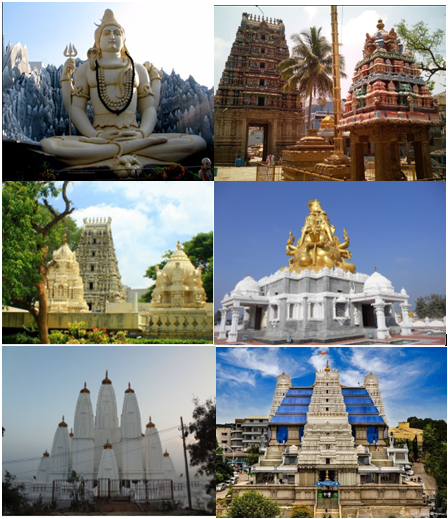

In [17]:
display(Image(filename='C:/Users/AKSHATA/Desktop/img/temple.PNG',width=500,height=600))

In [18]:
# Find the coordinates of Bengaluru
address = 'Bangalore'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangalore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangalore are 12.9791198, 77.5912997.


In [19]:
#foursquare API client ID,Client secret and client version
CLIENT_ID = 'NOLKINCYIKBU3QBCLDWAWDK1L42XKUE2UGCGFGM13MU5WA15'
CLIENT_SECRET = 'I4IE5DMLZ4ELC2DSCILESUHKU5XTZG3CSQTG4NR1CHSJ1JYX'
VERSION = '20181102'

In [20]:
# Explore the venues in Bengaluru and convert the result into json file
LIMIT = 200
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    latitude, 
    longitude, 
    VERSION, 
    radius, 
    LIMIT)

In [21]:
results = requests.get(url).json()
#results

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Cubbon Park,Park,12.977042,77.595277
1,Vidhana Soudha,Capitol Building,12.979027,77.591881
2,JW Marriott Hotel Bengaluru,Hotel,12.972362,77.595051
3,J W Kitchen,Asian Restaurant,12.972410,77.594592
4,M. Chinnaswamy Stadium,Cricket Ground,12.978144,77.599223


In [24]:
# Beow are to just give an example, the list of buildings/locations in just 1000 radius
pd.value_counts(nearby_venues['categories'])

Indian Restaurant           10
Hotel                        6
Italian Restaurant           4
Coffee Shop                  4
Lounge                       4
Café                         3
Japanese Restaurant          2
Electronics Store            2
Pizza Place                  2
Mexican Restaurant           2
Plaza                        2
Park                         2
Tennis Stadium               1
Tea Room                     1
Karnataka Restaurant         1
Asian Restaurant             1
Boutique                     1
Cupcake Shop                 1
Planetarium                  1
Dessert Shop                 1
Cricket Ground               1
Art Gallery                  1
Food Truck                   1
Clothing Store               1
Bakery                       1
Chinese Restaurant           1
Juice Bar                    1
French Restaurant            1
Sandwich Place               1
Bistro                       1
Concert Hall                 1
Science Museum               1
Fast Foo

              Bangalore is the third-largest city in India and was once called “The Garden City” because of its many green spaces. Home to more than 12 million people it attracts of 1.5 million tourists a year.The city is filled with lush green parks, offering a respite from the stifling Indian heat. Bangalore developed a reputation as being a progressive, well-designed and green city. As you visit Bangalore, you will notice the surrounding greenery, roads lined with trees and hedges, and public parks abundant with gardens.There are many parks where you can enjoy the Garden City’s greenery, such as Lalbagh Botanical Garden, Cubbon Park, Kariappa Memorial Park and more. The parks are common places for locals to relax as well as tourists. In the early morning hours before the sun gets too hot, many people jog and exercise along the trails. The parks are well-maintained and while many of them are free, some charge a small entry fee.
              
##### Lets find out famous parks in Bengaluru using foursquare API

In [53]:
search_query = 'Park'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
# send GET request and get trending venues
results = requests.get(url).json()
#results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Cubbon Park,Park,M G Road,IN,Bangalore,India,NaN,489,"[M G Road, Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 12.97704217520378...",12.977042,77.595277,NaN,Karnātaka,4bbc4513e45295217db855a4
1,Cubbon Park- Dog Park,Dog Run,NaN,IN,NaN,India,NaN,526,[India],"[{'label': 'display', 'lat': 12.974515, 'lng':...",12.974515,77.590203,NaN,NaN,58a90bfc84c4ed44f54b8e3b
2,Indira Gandhi Musical Fountain Park,Other Great Outdoors,Opp. GPO,IN,Bangalore,India,NaN,669,"[Opp. GPO, Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 12.98511929584024...",12.985119,77.591784,NaN,Karnātaka,4c7a5b9e93ef236a7551b20f
3,Cubbon Park Metro Station,Metro Station,Cubbon Park,IN,Bangalore,India,NaN,728,"[Cubbon Park, Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 12.98043682607872...",12.980437,77.597878,NaN,Karnātaka,5724ab3ecd102256e4e30d26
4,Cubbon Park Parking 1,Moving Target,NaN,IN,NaN,India,NaN,367,[India],"[{'label': 'display', 'lat': 12.98111203254117...",12.981112,77.593996,NaN,NaN,510df5f0e4b0af957cedcbc7
5,JP Techno Park,Office,NaN,IN,NaN,India,NaN,963,[India],"[{'label': 'display', 'lat': 12.98773880436245...",12.987739,77.590471,NaN,NaN,55485455498eab91b1f83d0f
6,Cubbon Park Library Play Ground,Dog Run,Sampangirama Nagar,IN,Bangalore,India,NaN,524,"[Sampangirama Nagar, Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 12.97452174997916...",12.974522,77.590236,NaN,Karnātaka,4c8c615aed3ab60c0e9d6721
7,Eden Park Restaurant,Indian Restaurant,"Next to Hindu Office, Off Infantry Road",IN,Bangalore,India,NaN,937,"[Next to Hindu Office, Off Infantry Road, Bang...","[{'label': 'display', 'lat': 12.98345552406055...",12.983456,77.598707,560052,Karnātaka,4b9da64ef964a5202db836e3
8,Bruhat Bangalore Mahanagar Palike Park,Park,Indiranagar,IN,Bangalore,India,1st Stage,499,"[Indiranagar (1st Stage), Bangalore 560038, Ka...","[{'label': 'display', 'lat': 12.98250483083889...",12.982505,77.594327,560038,Karnātaka,4f8ced3ae4b013d9a4c59a88
9,Freedom Park,Park,Seshadri Road,IN,Bangalore,India,Seshadri Road,976,"[Seshadri Road (Seshadri Road), Bangalore 5600...","[{'label': 'display', 'lat': 12.97800804978846...",12.978008,77.582373,560001,Karnātaka,4c786dfadbaa76b08021154b


In [26]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around the Parks

# add a red circle marker to represent the Parks
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Park',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Parks as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

#display map
venues_map

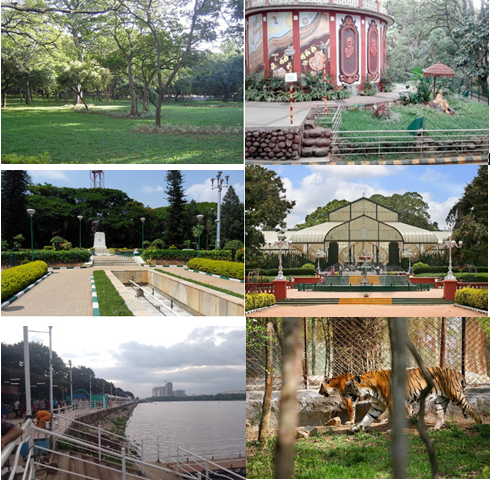

In [27]:
#Below is images of Parks in Bengaluru
display(Image(filename='C:/Users/AKSHATA/Desktop/img/parks.PNG',width=500,height=600))


             Party-hoppers often remark that one hasn’t lived well if one hasn’t partied well – an apt way of describing Bangalore nightlife.The city is called "Pub City of India" and has full of pubs, clubs and restaurants that cover every aspect of parties and nightlife.Some aspects that make the nightlife of Bangalore much better than other places are the people who live here, the kind of artists it attracts, the weather etc. The city has people from different corners of the world and the busy crowd knows how to party.
 
##### Find below some of the famous bars and Pub in the city using foursqaure API

In [54]:
search_query = 'Bar'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
# send GET request and get trending venues
results = requests.get(url).json()
#results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered1 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered1['categories'] = dataframe_filtered1.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered1.columns = [column.split('.')[-1] for column in dataframe_filtered1.columns]

dataframe_filtered1.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Sreeraj Lassi Bar,Juice Bar,NaN,IN,NaN,India,NaN,602,[India],"[{'label': 'display', 'lat': 12.98318323708627...",12.983183,77.587633,NaN,NaN,NaN,4db3ff8143a1369cb5b09062
1,The Blue Bar,Hotel Bar,Taj West End,IN,Bangalore,India,"55, Race Course Rd",1020,"[Taj West End (55, Race Course Rd), Bangalore ...","[{'label': 'display', 'lat': 12.98487184888359...",12.984872,77.583973,NaN,560001,Karnātaka,4b4c5d2af964a52099b126e3
2,Black Dog Bar,Bar,St Marks Rd,IN,Bangalore,India,St marks road,1123,"[St Marks Rd (St marks road), Bangalore, Karnā...","[{'label': 'display', 'lat': 12.97456282253583...",12.974563,77.600538,NaN,NaN,Karnātaka,4db053238154905aadabcc16
3,Karnataka State Bar Council,Government Building,NaN,IN,NaN,India,NaN,327,[India],"[{'label': 'display', 'lat': 12.979568, 'lng':...",12.979568,77.594287,NaN,NaN,NaN,4fd815eae4b00148b8fa5847
4,Bar Uno @JW Marriott,Bar,NaN,IN,NaN,India,NaN,830,[India],"[{'label': 'display', 'lat': 12.97240249467849...",12.972402,77.594626,NaN,NaN,NaN,5297359e498e5adeafe3d64c
5,Sports Bar @ Le Meridien,Sports Bar,Palace Road,IN,Bangalore,India,NaN,447,"[Palace Road, Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 12.98226243744058...",12.982262,77.593879,NaN,NaN,Karnātaka,4daafc21cda1652a2b98874c
6,1Q1 - Bar & Kitchen,Theme Restaurant,"No. 1, Express Building, Vasanth Nagar, Bengal...",IN,Bangalore,India,Queen's Road,785,"[No. 1, Express Building, Vasanth Nagar, Benga...","[{'label': 'display', 'lat': 12.983765, 'lng':...",12.983765,77.596756,NaN,560051,Karnātaka,5a62e28ba22db730c387e43c
7,Hookah Bar,None,NaN,IN,NaN,India,NaN,829,[India],"[{'label': 'display', 'lat': 12.973663, 'lng':...",12.973663,77.596507,NaN,NaN,NaN,582b1eb35783757387c0b695
8,blue bar liqour Stash,Hobby Shop,NaN,IN,NaN,India,NaN,1024,[India],"[{'label': 'display', 'lat': 12.98496755938981...",12.984968,77.584008,NaN,NaN,NaN,52e4502011d2ab245695c1cd
9,jagdish bar,Bar,K'halli Main Road,IN,B'lore,India,NaN,917,"[K'halli Main Road, B'lore 5600043, Karnātaka,...","[{'label': 'display', 'lat': 12.97158527374267...",12.971585,77.587868,NaN,5600043,Karnātaka,51223c58e4b0d2f625b820ec


In [29]:
venues_map1 = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Pub

# add a red circle marker to represent the Pub
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Pub',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map1)

# add the Pubs as blue circle markers
for lat, lng, label in zip(dataframe_filtered1.lat, dataframe_filtered1.lng, dataframe_filtered1.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map1)

#display map
venues_map1

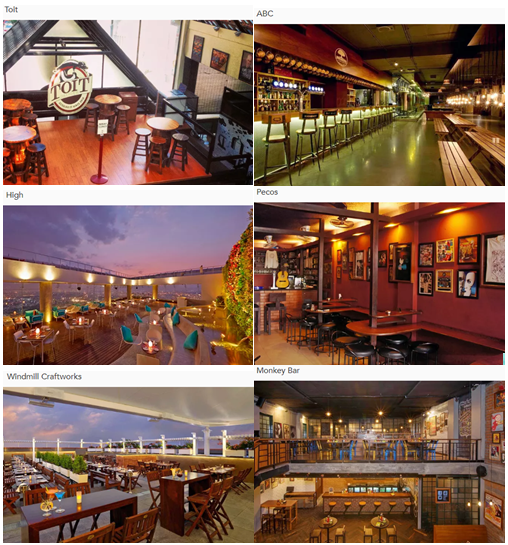

In [34]:
# Images of Pub in the city
display(Image(filename='C:/Users/AKSHATA/Desktop/img/Pubs.PNG',width=500,height=600))

In [35]:
search_query = 'Indian Restaurant'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
# send GET request and get trending venues
results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered5 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered5['categories'] = dataframe_filtered5.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered5.columns = [column.split('.')[-1] for column in dataframe_filtered5.columns]

dataframe_filtered5.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Indian Spicy Restaurant,Indian Restaurant,NaN,IN,NaN,India,NaN,761,[India],"[{'label': 'display', 'lat': 12.983172, 'lng':...",12.983172,77.596960,NaN,NaN,56b5d590498e81e7321957c1
1,Indian Oil Petrol Pump,Gas Station,St Marks Road,IN,Bangalore,India,NaN,1167,"[St Marks Road, Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 12.97522825681465...",12.975228,77.601290,NaN,Karnātaka,4e6f09008130f6aa99df7f18
2,Sunny's Indian Kitchen,Indian Restaurant,35/2 Kasturba Road Cross,IN,Bangalore,India,Lavelle Road,1068,"[35/2 Kasturba Road Cross (Lavelle Road), Bang...","[{'label': 'display', 'lat': 12.97350231419820...",12.973502,77.599284,560001,Karnātaka,517aa129498e4dd18c2215ea
3,Indian Express,Office,NaN,IN,NaN,India,NaN,687,[India],"[{'label': 'display', 'lat': 12.98362055909728...",12.983621,77.595636,NaN,NaN,4cf0f016899c6ea8f187edc1
4,Indian Express Bus Stop,Bus Stop,NaN,IN,NaN,India,NaN,773,[India],"[{'label': 'display', 'lat': 12.98379703780935...",12.983797,77.596576,NaN,NaN,54a10377498ed981ab0394f9


In [36]:
venues_map5 = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around the Indian Restaurants

# add a red circle marker to represent the Indian Restaurants
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Indian Restaurant',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map5)

# add the Indian Restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered5.lat, dataframe_filtered5.lng, dataframe_filtered5.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map5)

#display map
venues_map5

In [37]:
search_query = 'Italian Restaurant'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
# send GET request and get trending venues
results = requests.get(url).json()

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered6 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered6['categories'] = dataframe_filtered6.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered6.columns = [column.split('.')[-1] for column in dataframe_filtered6.columns]

dataframe_filtered6.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Koshy's,Indian Restaurant,"No 39, St. Marks Road",IN,Bangalore,India,NaN,1185,"[No 39, St. Marks Road, Bangalore 560001, Karn...","[{'label': 'display', 'lat': 12.97572678874464...",12.975727,77.601656,560001,Karnātaka,4b87c36df964a520caca31e3
1,McDonald's,Fast Food Restaurant,Sigma Mall,IN,Bangalore,India,Cunningham Rd,1038,"[Sigma Mall (Cunningham Rd), Bangalore 560052,...","[{'label': 'display', 'lat': 12.98789456305853...",12.987895,77.594558,560052,Karnātaka,4b854bb8f964a520205531e3
2,Mynt,Coffee Shop,Taj West End,IN,Bangalore,India,NaN,919,"[Taj West End, Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 12.98462908999613...",12.984629,77.584989,NaN,Karnātaka,4da9e320fa8cc7649726717a
3,Aathithya Restaurant,None,149 Infantry Road,IN,Bangalore 560 001,India,NaN,586,"[149 Infantry Road, Bangalore 560 001, Karnata...","[{'label': 'display', 'lat': 12.98395633333333...",12.983956,77.593435,NaN,Karnataka State,4d64ff3c6ccdba7a26b09dc3
4,McDonald's,Fast Food Restaurant,"#10, M/S India Garage",IN,Bangalore,India,Kasturba Rd,843,"[#10, M/S India Garage (Kasturba Rd), Bangalor...","[{'label': 'display', 'lat': 12.97601110457848...",12.976011,77.598391,560001,Karnātaka,4c82065fdc018cfa696fcb6c


In [38]:
venues_map6 = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around the Italian Restaurants

# add a red circle marker to represent the Italian Restaurants
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Italian Restaurant',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map6)

# add the Italian Restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered6.lat, dataframe_filtered6.lng, dataframe_filtered6.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map6)

#display map
venues_map6

In [39]:
search_query = 'French Restaurant'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
# send GET request and get trending venues
results = requests.get(url).json()
#results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered7 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered7['categories'] = dataframe_filtered7.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered7.columns = [column.split('.')[-1] for column in dataframe_filtered7.columns]

dataframe_filtered7.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,French Loaf,Bakery,Near Cafe Coffee Day,IN,Bangalore,India,Cunningham Street,922,"[Near Cafe Coffee Day (Cunningham Street), Ban...","[{'label': 'display', 'lat': 12.98553041981922...",12.985530,77.596694,NaN,Karnātaka,50fbf73ee4b06b7fe4946c57
1,Koshy's,Indian Restaurant,"No 39, St. Marks Road",IN,Bangalore,India,NaN,1185,"[No 39, St. Marks Road, Bangalore 560001, Karn...","[{'label': 'display', 'lat': 12.97572678874464...",12.975727,77.601656,560001,Karnātaka,4b87c36df964a520caca31e3
2,McDonald's,Fast Food Restaurant,Sigma Mall,IN,Bangalore,India,Cunningham Rd,1038,"[Sigma Mall (Cunningham Rd), Bangalore 560052,...","[{'label': 'display', 'lat': 12.98789456305853...",12.987895,77.594558,560052,Karnātaka,4b854bb8f964a520205531e3
3,Mynt,Coffee Shop,Taj West End,IN,Bangalore,India,NaN,919,"[Taj West End, Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 12.98462908999613...",12.984629,77.584989,NaN,Karnātaka,4da9e320fa8cc7649726717a
4,Aathithya Restaurant,None,149 Infantry Road,IN,Bangalore 560 001,India,NaN,586,"[149 Infantry Road, Bangalore 560 001, Karnata...","[{'label': 'display', 'lat': 12.98395633333333...",12.983956,77.593435,NaN,Karnataka State,4d64ff3c6ccdba7a26b09dc3


In [40]:
venues_map7 = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around the French Restaurants

# add a red circle marker to represent the French Restaurants
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='French Restaurant',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map7)

# add the French Restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered7.lat, dataframe_filtered7.lng, dataframe_filtered7.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map7)

#display map
venues_map7

            Bengaluru is famous for its swanky malls, but thriving street markets in Bangalore ensure that there are many options for shopping in Bangalore on a budget. From bustling Commercial Street to the famous stretches of MG Road and Brigade Road, these shopping destinations in Bangalore offer good bargains and easy-on-wallet deals. Packed with stalls stocking a variety of accessories, shoes, apparels, books and antiques, these street markets are perfect for indulging in some affordable retail therapy. Street shopping in Bangalore is a real joy as there is a lot of variety available and you can get a good deal if you are well adept in the art and science of bargaining. The name of MG Road rings a bell at the very moment someone mentions Bangalore and its shopping scope. A famous road stretch that runs for several kilometres through the city, MG Road is a tourist destination in itself in Bangalore. Shopping hubs such as Shrungar Shopping Complex, Bombay Swadeshi, Spencer's super market and Barton Court are located along MG Road.
            Bengaluru had a magnificent mix of the past and present which is well presented through its captivating museums.
            
##### Lets explore art gallery and shopping centres of the city using foursquare API

In [41]:
search_query = 'Museum'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
# send GET request and get trending venues
results = requests.get(url).json()
#results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered2 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]

dataframe_filtered2.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Visvesvaraya Industrial and Technological Museum,Science Museum,Kasturba Road,IN,Bangalore,India,NaN,737,"[Kasturba Road, Bangalore 560001, Karnātaka, I...","[{'label': 'display', 'lat': 12.97488398091553...",12.974884,77.596526,560001,Karnātaka,4cb9476423a4199cf14bed89
1,Karnataka museum,Museum,Kasturba road,IN,Bangalore,India,SR Nagar,691,"[Kasturba road (SR Nagar), Bangalore 562001, K...","[{'label': 'display', 'lat': 12.97454006717829...",12.974540,77.595608,562001,Karnātaka,4cf0ab3f6195721e691a3dc1
2,VIT MUSEUM,Science Museum,NaN,IN,NaN,India,NaN,956,[India],"[{'label': 'display', 'lat': 12.97486769169393...",12.974868,77.598960,NaN,NaN,4daa8d018154abafc2b01d3d
3,Vishveshwaraiah Science Museum,Science Museum,NaN,IN,NaN,India,NaN,905,[India],"[{'label': 'display', 'lat': 12.97471209831813...",12.974712,77.598316,NaN,NaN,5115df7ee4b03bdda6cc6f54
4,MKF Museum Of Art,Art Museum,NaN,IN,Bangalore,India,NaN,1165,"[Bangalore 560001, Karnātaka, India]","[{'label': 'display', 'lat': 12.970705, 'lng':...",12.970705,77.597690,560001,Karnātaka,5c42fc0b97cf5a002ceaaff1


In [42]:
venues_map2 = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around the Museum

# add a red circle marker to represent the Museum
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Museum',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map2)

# add the Museums as blue circle markers
for lat, lng, label in zip(dataframe_filtered2.lat, dataframe_filtered2.lng, dataframe_filtered2.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map2)

#display map
venues_map2

In [43]:
search_query = 'Mall'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
# send GET request and get trending venues
results = requests.get(url).json()
#results

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered3 = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered3['categories'] = dataframe_filtered3.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered3.columns = [column.split('.')[-1] for column in dataframe_filtered3.columns]

dataframe_filtered3.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Quiznos @ Inorbit Mall,Sandwich Place,"Inorbit mall, Whitefield",IN,Bangalore,India,NaN,430,"[Inorbit mall, Whitefield, Bangalore 560066, K...","[{'label': 'display', 'lat': 12.97960801900571...",12.979608,77.587360,NaN,560066,Karnātaka,5094dd6ae4b0d8a7b31963f8
1,"G K Vale, Sigma Mall",Photography Lab,NaN,IN,Bangalore,India,NaN,654,"[Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 12.98335789678297...",12.983358,77.595479,NaN,NaN,Karnātaka,4dbd42dc93a08f9274d145a1
2,"Archie's, Sigma Mall",Gift Shop,NaN,IN,NaN,India,NaN,980,[India],"[{'label': 'display', 'lat': 12.98449492710588...",12.984495,77.598462,NaN,NaN,NaN,4edf92c06c25b6f304215fa0
3,Sigma Mall,Shopping Mall,"#15, #16, #17",IN,Bangalore,India,"Cunningham Rd, Vasanth Nagar",1029,"[#15, #16, #17 (Cunningham Rd, Vasanth Nagar),...","[{'label': 'display', 'lat': 12.98783257812767...",12.987833,77.594494,NaN,560052,Karnātaka,4b9908c4f964a520125d35e3
4,Go Gola @Sigma Mall,None,NaN,IN,Bangalore,India,sigma mall,1051,"[sigma mall, Bangalore, Karnātaka, India]","[{'label': 'display', 'lat': 12.98791423160296...",12.987914,77.594847,NaN,NaN,Karnātaka,4d569e4058856dcbb1215a6d


In [44]:
venues_map3 = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around the Malls

# add a red circle marker to represent the Malls
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Mall',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map3)

# add the Malls as blue circle markers
for lat, lng, label in zip(dataframe_filtered3.lat, dataframe_filtered3.lng, dataframe_filtered3.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map3)

#display map
venues_map3

               Bengaluru is called "Silicon Valley of India".The Economy of Bangalore is an important part of the economy of India as a whole and contributes over 87% to the Economy of the State of Karnataka, accounting for 98% of the Software Exports of the State.The establishment and success of high technology firms in Bangalore has led to the growth of Information Technology (IT) in India.
               
##### Below are famous IT tech parks in Bengaluru explored using Foursquare API

In [45]:
list_ = ['Bagmane Tech Park','International Tech Park','Brigade Tech Park','Embassy Tech Park','RMZ Ecospace','RMZ Infinity','RMZ Millenia','RMZ Ecoworld','Prestige Shantiniketan','Manyata Embassy Business Park']
list_

['Bagmane Tech Park',
 'International Tech Park',
 'Brigade Tech Park',
 'Embassy Tech Park',
 'RMZ Ecospace',
 'RMZ Infinity',
 'RMZ Millenia',
 'RMZ Ecoworld',
 'Prestige Shantiniketan',
 'Manyata Embassy Business Park']

In [46]:
def borough_loc(list_of_places):
    for place in list_of_places:
        address = (place)
        geolocator = Nominatim(user_agent="To_explorer")
        location = geolocator.geocode(address)
        latitude1 = location.latitude
        longitude1 = location.longitude
        print('{''}, {}, {},'.format(place,latitude1,longitude1))

borough_loc(list_)

Bagmane Tech Park, 12.97879755, 77.6588847668024,
International Tech Park, 12.98394245, 80.2461198456431,
Brigade Tech Park, 12.98628565, 77.7401216620803,
Embassy Tech Park, 12.9265941, 77.693055,
RMZ Ecospace, 12.9241467, 77.6810485694887,
RMZ Infinity, 12.9941626, 77.6605597517053,
RMZ Millenia, 12.9730868, 80.2430635199243,
RMZ Ecoworld, 12.92054135, 77.6844140267689,
Prestige Shantiniketan, 12.99271385, 77.729536493504,
Manyata Embassy Business Park, 13.0483585, 77.6210955212444,


In [47]:
location = ['Bagmane Tech Park', 12.97879755, 77.6588847668024,
'International Tech Park', 12.98394245, 80.2461198456431,
'Brigade Tech Park', 12.98628565, 77.7401216620803,
'Embassy Tech Park', 12.9265941, 77.693055,
'RMZ Ecospace', 12.9241467, 77.6810485694887,
'RMZ Infinity', 12.9941626, 77.6605597517053,
'RMZ Millenia', 12.9730868, 80.2430635199243,
'RMZ Ecoworld', 12.92054135, 77.6844140267689,
'Prestige Shantiniketan', 12.99271385, 77.729536493504,
'Manyata Embassy Business Park', 13.0483585, 77.6210955212444]

location_df = pd.DataFrame(np.array(location).reshape(10,3), columns=['Location','Latitude','Longitude'])
location_df

,Location,Latitude,Longitude
0,Bagmane Tech Park,12.97879755,77.6588847668024
1,International Tech Park,12.98394245,80.2461198456431
2,Brigade Tech Park,12.98628565,77.7401216620803
3,Embassy Tech Park,12.9265941,77.693055
4,RMZ Ecospace,12.9241467,77.6810485694887
5,RMZ Infinity,12.9941626,77.6605597517053
6,RMZ Millenia,12.9730868,80.2430635199243
7,RMZ Ecoworld,12.92054135,77.6844140267689
8,Prestige Shantiniketan,12.99271385,77.729536493504
9,Manyata Embassy Business Park,13.0483585,77.6210955212444


In [48]:
location_df.dtypes

location_df["Latitude"] = pd.to_numeric(location_df["Latitude"])
location_df["Longitude"] = pd.to_numeric(location_df["Longitude"])


In [49]:
# create a map of IT tech Park
map_tech_parks = folium.Map(location = [12.9241467,77.6810485694887],zoom_start = 15)

#add neighborhood markers to RMZ Ecospace tech park
for lat, long, bor in zip(location_df['Latitude'], location_df['Longitude'], 
                                 location_df['Location']):
    label = '{}'.format(bor)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius = 7, 
        popup = label,
        color = 'red',
        fill = True,
        fill_color = 'white',
        fill_opacity = 0.7,
        parse_html = False).add_to(map_tech_parks)
        
map_tech_parks

## Conclusion:
    
       According to a global survey,Technology hub Bangalore has been ranked the best Indian city to live in.Bangalore beat Delhi, Mumbai, Chennai and Calcutta to emerge as the leading city for its quality of life.
   
       Five Indian cities make the list, which Bangalore leads for quality of living and personal safety standards, a measure of stability and crime levels.Bangalore is followed by the capital, Delhi (global rank: 143), Mumbai (144), Chennai (150) and Calcutta (151).Bangalore is home to nearly 8.5 million people.It has more than 1,500 multinational software companies, is an information technology hub and is often referred to as the Silicon Valley of India.
       
       Most of the people fall in love with the city just because of its climate.it is one of the main reasons behind people migrating from other states to the city. The weather of Bangalore has always been a key attraction for the people. The morning is bright and sunny and the nights are cooler offering you a pleasant stay.
       
       Bangalore blends together the elements of traditional and modern lifestyle and value at the same time. There are places like MG road, Brigade Road, and Commercial Street, where the youth can go and enjoy shopping and socializing.
       
   Below is the graphical representation of population of city from 1950 to projected value till 2035(projected) which is increasing yearly indicating that the city attracts people on factors explored in the project to choose <b>_Bengaluru as the best place to live.<b>_

In [55]:
population = pd.read_csv("C:/Users/AKSHATA/Coursera_Capstone/data.csv", usecols=['Year','Population','Growth'])
population = population.rename(columns={population.columns[2]: 'Growth Difference'})
population = population.sort_values('Year')
population

,Year,Population,Growth Difference
18,1950,745999,0
17,1955,939396,193397
16,1960,1165978,226582
15,1965,1377314,211336
14,1970,1614756,237442
13,1975,2110599,495843
12,1980,2812428,701829
11,1985,3397214,584786
10,1990,4042598,645384
9,1995,4754228,711630


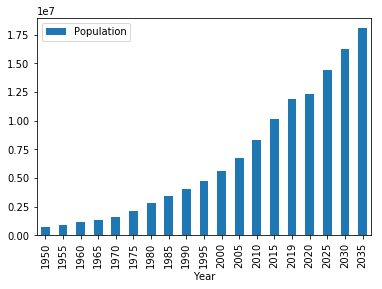

In [51]:
population.plot(kind = 'bar', x= 'Year', y= 'Population')